In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
#import seaborn as sns
#import pandas as pd


In [83]:

## ---- Defining iterated maps -----
def f_con(x, alpha=0.2, beta=0.2, a=0.2, b=5):
    x1 = alpha + (1-alpha)*x*np.exp(-beta/(a + b*x))
    return x1

def f_sig(x, alpha=0.2, beta=0.2, a=0.2, b=5):
    x1 = (1+alpha)*x*np.exp(-beta/(a+b*x)) - alpha*(x**2)*np.exp(-2*beta/(a+b*x))
    return x1 


# Finding fixed points - we solve f(x) = x
def find_fixed_points(f, x_guesses):
    fixed_points = []
    for guess in x_guesses:
        sol = fsolve(lambda x: f(x) - x, guess)
        if abs(f(sol) - sol) < 1e-10:  # Check if it's really a fixed point
            fixed_points.append(sol[0])
    return np.unique(fixed_points)

# For stability, we need derivatives
def numerical_derivative(f, x, h=1e-7):
    return (f(x + h) - f(x - h))/(2*h)


# For plotting cobweb diagrams: 
def plot_cobweb(f, x0, n_iterations, xmin=0, xmax=1, title="Cobweb Diagram"):
    x = np.linspace(xmin, xmax, 1000)
    y = f(x)
    
    plt.figure(figsize=(10, 10))
    plt.plot(x, y, 'b-', label='f(x)')
    plt.plot(x, x, 'k--', label='y=x')
    
    # Cobweb
    x_curr = x0
    trajectory = [x_curr]
    for i in range(n_iterations):
        y_curr = f(x_curr)
        plt.plot([x_curr, x_curr], [x_curr, y_curr], 'r-', alpha=0.5)
        plt.plot([x_curr, y_curr], [y_curr, y_curr], 'r-', alpha=0.5)
        x_curr = y_curr
        trajectory.append(x_curr)
    
    plt.grid(True)
    plt.legend()
    plt.title(title)
    plt.xlabel('x_n')
    plt.ylabel('x_{n+1}')
    plt.show()
    
    return trajectory


def create_bifurcation_diagram(param_range, param_name='a', n_points=100):
    """
    Create bifurcation diagram by tracking fixed points as parameter varies.
    
    Parameters:
    -----------
    param_range : tuple
        Range of parameter values (min, max)
    param_name : str
        Parameter to vary ('a' or 'b')
    n_points : int
        Number of parameter values to try
    """
    param_values = np.linspace(param_range[0], param_range[1], n_points)
    fixed_points = []
    stability = []
    
    for param in param_values:
        # Create function with current parameter value
        if param_name == 'a':
            f = lambda x: f_sig(x, a=param)
        else:
            f = lambda x: f_sig(x, b=param)
            
        # Find fixed points for this parameter value
        fps = find_all_fixed_points(f)
        
        # Store fixed points and their stability
        for fp in fps:
            deriv, _ = check_stability(f, fp)
            fixed_points.append([param, fp])
            stability.append('stable' if abs(deriv) < 1 else 'unstable')
    
    fixed_points = np.array(fixed_points)

    # Plot bifurcation diagram
    plt.figure(figsize=(12, 8))
    
    # Plot stable points in blue, unstable in red
    stable_mask = np.array(stability) == 'stable'
    
    plt.plot(fixed_points[stable_mask, 0], fixed_points[stable_mask, 1], 
             'b.', label='Stable', markersize=1)
    plt.plot(fixed_points[~stable_mask, 0], fixed_points[~stable_mask, 1], 
             'r.', label='Unstable', markersize=1)
    
    plt.xlabel(f'Parameter {param_name}')
    plt.ylabel('Fixed Point Value')
    plt.title(f'Bifurcation Diagram for Parameter {param_name}')
    plt.legend()
    #plt.grid(True)
    plt.show()

In [84]:
# Try several initial guesses to find all fixed points
x_guesses = np.linspace(0, 1, 20)
fp_con = find_fixed_points(f_con, x_guesses)
fp_sig = find_fixed_points(f_sig, x_guesses)

print("Fixed points for f_con:", fp_con)
for fp in fp_con:
    deriv = numerical_derivative(f_con, fp)
    print(f"Stability at {fp:.4f}: {'stable' if abs(deriv) < 1 else 'unstable'} (derivative = {deriv:.4f})")

print("\nFixed points for f_sig:", fp_sig)
for fp in fp_sig:
    deriv = numerical_derivative(f_sig, fp)
    print(f"Stability at {fp:.4f}: {'stable' if abs(deriv) < 1 else 'unstable'} (derivative = {deriv:.4f})")

Fixed points for f_con: [0.85056745 0.85056745 0.85056745 0.85056745 0.85056745 0.85056745
 0.85056745 0.85056745 0.85056745 0.85056745 0.85056745 0.85056745]
Stability at 0.8506: stable (derivative = 0.7977)
Stability at 0.8506: stable (derivative = 0.7977)
Stability at 0.8506: stable (derivative = 0.7977)
Stability at 0.8506: stable (derivative = 0.7977)
Stability at 0.8506: stable (derivative = 0.7977)
Stability at 0.8506: stable (derivative = 0.7977)
Stability at 0.8506: stable (derivative = 0.7977)
Stability at 0.8506: stable (derivative = 0.7977)
Stability at 0.8506: stable (derivative = 0.7977)
Stability at 0.8506: stable (derivative = 0.7977)
Stability at 0.8506: stable (derivative = 0.7977)
Stability at 0.8506: stable (derivative = 0.7977)

Fixed points for f_sig: [0.         0.22854348 0.22854348 0.22854348 0.22854348 0.22854348
 0.22854348 0.22854348 0.22854348 0.22854348 0.79044038 0.79044038
 0.79044038 0.79044038 0.79044038 0.79044038 0.79044038 0.79044038
 0.79044038 0.7

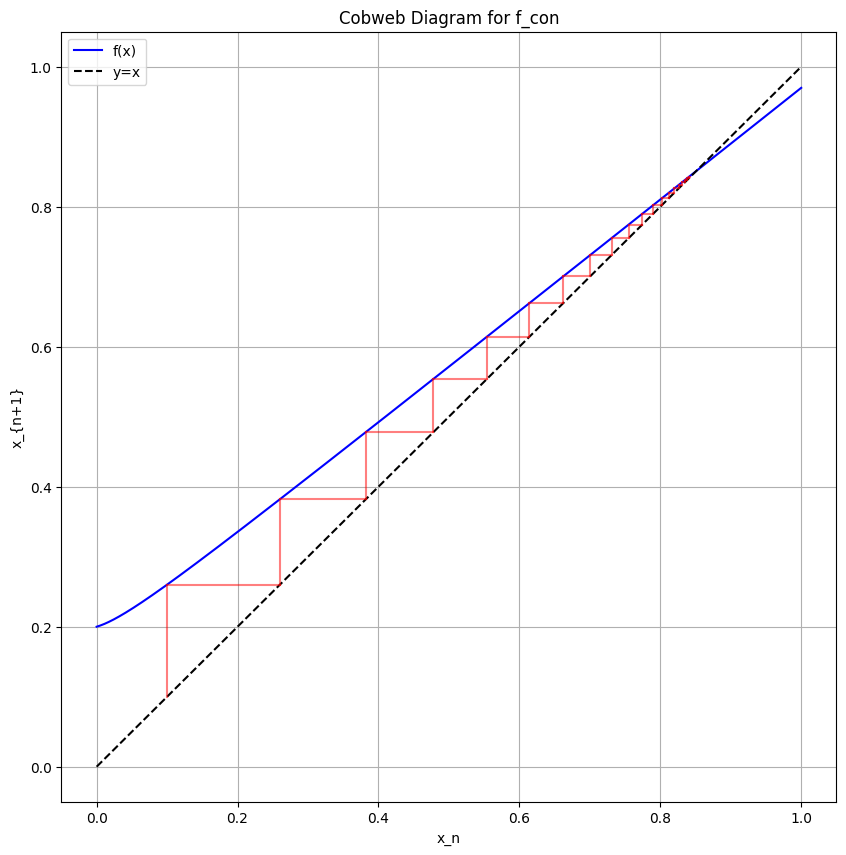

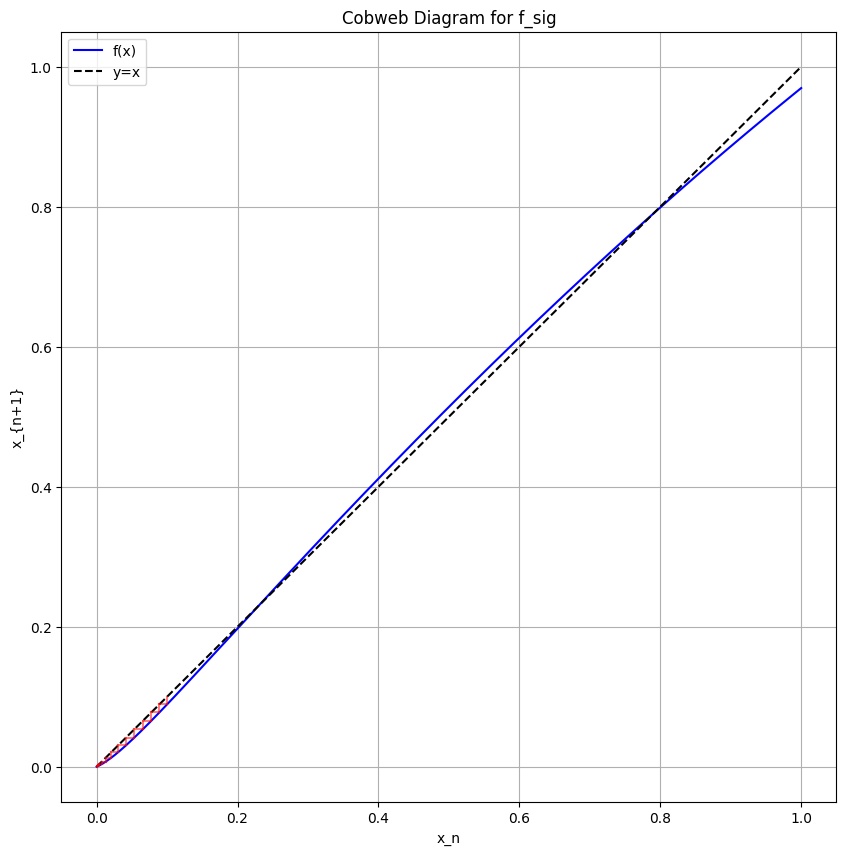

In [85]:
# Let's create cobweb diagrams for both functions
trajectory_con = plot_cobweb(f_con, x0=0.1, n_iterations=20, title="Cobweb Diagram for f_con")
trajectory_sig = plot_cobweb(f_sig, x0=0.1, n_iterations=20, title="Cobweb Diagram for f_sig")

## 2. Try 2

In [86]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

def find_all_fixed_points(f, x_range=(0,1), n_guesses=100, tolerance=1e-6):
    """
    Find all fixed points of function f in given range using multiple initial guesses.
    
    Parameters:
    -----------
    f : function
        The iterated map function
    x_range : tuple
        Range to search for fixed points (min, max)
    n_guesses : int
        Number of initial guesses to try
    tolerance : float
        Tolerance for considering a point as fixed point
        
    Returns:
    --------
    fixed_points : list
        List of all unique fixed points found
    """
    # Create array of initial guesses
    x_guesses = np.linspace(x_range[0], x_range[1], n_guesses)
    fixed_points = []
    
    # Function to find zeros of f(x) - x
    def fixed_point_equation(x):
        return f(x) - x
    
    # Try each initial guess
    for x0 in x_guesses:
        sol = fsolve(fixed_point_equation, x0)
        # Check if it's actually a fixed point and within range
        if (abs(fixed_point_equation(sol)) < tolerance and 
            x_range[0] <= sol <= x_range[1]):
            fixed_points.append(sol[0])
    
    # Remove duplicates within tolerance
    unique_fps = []
    for fp in sorted(fixed_points):
        if not unique_fps or min(abs(np.array(unique_fps) - fp)) > tolerance:
            unique_fps.append(fp)
            
    return np.array(unique_fps)


# Find all fixed points
fps = find_all_fixed_points(f_sig)
print("Found fixed points:", fps)

# Check stability of each fixed point
def check_stability(f, x, h=1e-7):
    """Calculate derivative at fixed point and determine stability"""
    deriv = (f(x + h) - f(x - h))/(2*h)
    return deriv, 'stable' if abs(deriv) < 1 else 'unstable'

for fp in fps:
    deriv, stability = check_stability(f_sig, fp)
    print(f"Fixed point {fp:.4f}: {stability} (derivative = {deriv:.4f})")

Found fixed points: [0.]
Fixed point 0.0000: stable (derivative = 0.4415)


/tmp/ipykernel_57273/1288702280.py:51: RuntimeWarning: overflow encountered in exp
  return (1+alpha)*x*np.exp(-beta/(a+b*x)) - alpha*(x**2)*np.exp(-2*beta/(a+b*x))


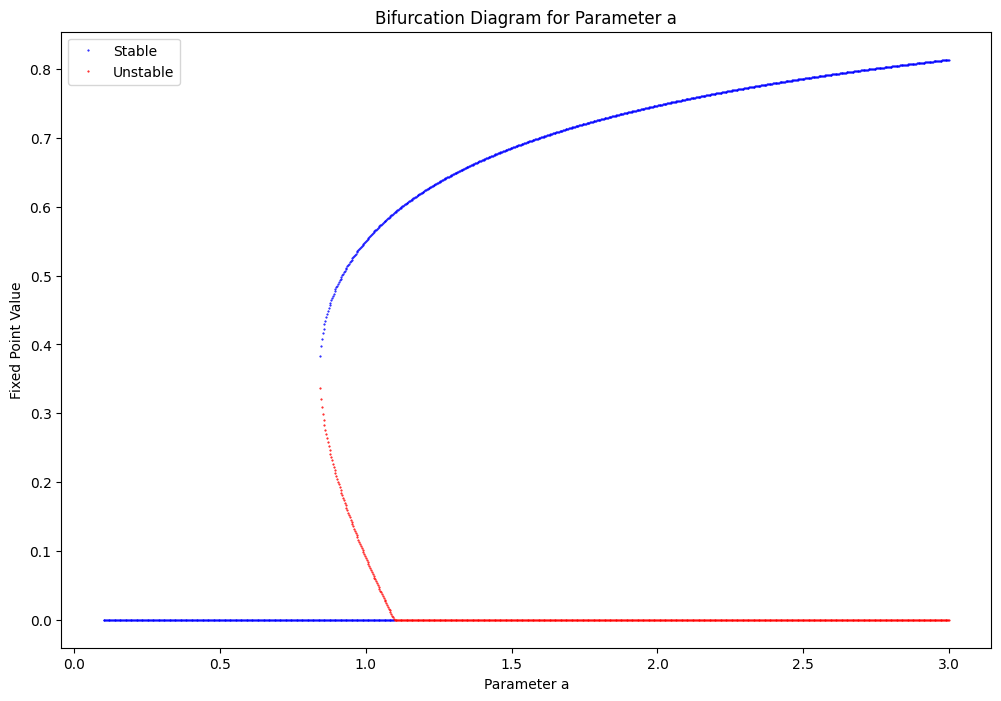

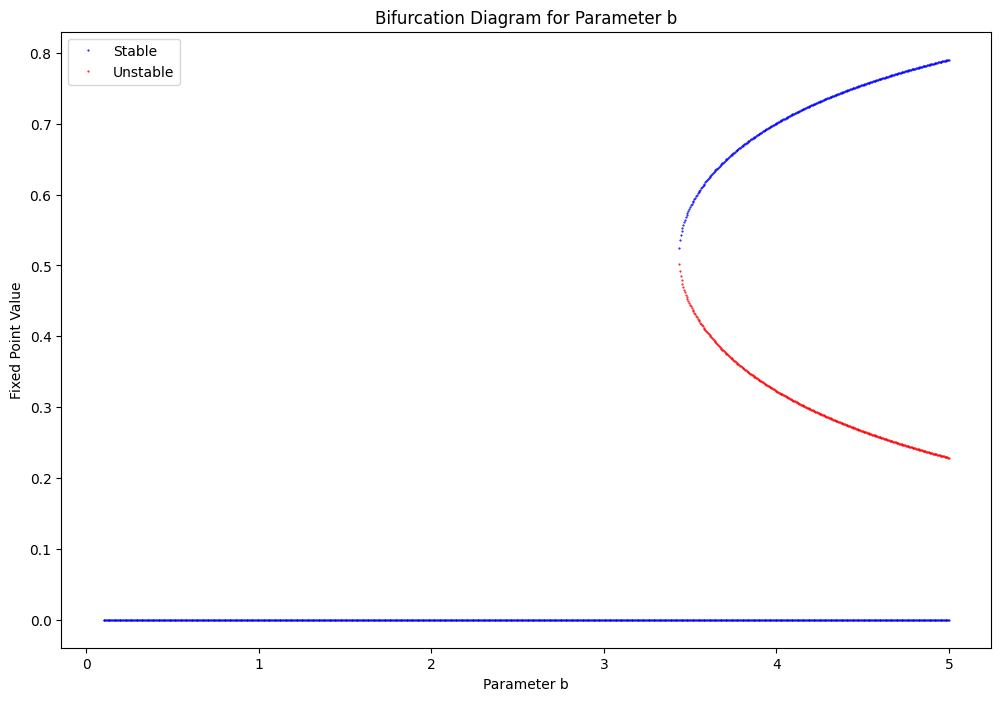

In [82]:

# Create bifurcation diagrams for both parameters
create_bifurcation_diagram((0.1, 3.0), 'a', n_points=1000)
create_bifurcation_diagram((0.1, 5.0), 'b', n_points=1000)